# Part1. Import and install Required Moudels. 

In [ ]:
!pip install fiona==1.8.20
!pip install geojson==2.5.0
!pip install shapely==1.8.0
!pip install geopandas
! pip install reverse_geocoder


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import ee
import geopy
import geopy.distance
import fiona
import geojson
import shapely.ops as ops
from shapely.geometry import Polygon
import geopandas as gpd
import reverse_geocoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Trigger the authentication flow.
ee.Authenticate()
# Initialize the library.
ee.Initialize()


# Part2. Raw Data Extraction

Extraction target area fire from altas fire dataset. 
Target area range from 32.7N to 42N, and -124.26W to -93.5W. 
Randomly dropped 70% small fire, which has duration less or equal than one day.  

In [ ]:

# unzip original data file and store on target file
path = "drive/MyDrive/Wildfire/dataset/CMS_Global_Fire_Atlas_1642/data/"
destination_path = "drive/MyDrive/Wildfire/dataset/CMS_Global_Fire_Atlas_1642/unzip_data/"
import zipfile
import os
import shutil

def unzip_file(zip_file_name, destination_path):
  archive = zipfile.ZipFile(zip_file_name, mode = 'r')
  for file in archive.namelist():
    archive.extract(file, destination_path)

format_ = ["zip", 'rar', '7z']
files = [i for i in os.listdir(path) if i.split(".")[-1] in format_]
files.sort(reverse=False)
print(files)
    
for file in files:
    zip_file_name = path + file
    print(zip_file_name)
    unzip_file(zip_file_name,destination_path)


In [ ]:
#############################################################################

max_xy = []
min_xy = []
coord_xy = []

veg_max = []
veg_min = []
veg_coord = []
expansion = []
speed = []
fire_line = []
perimeter = []
direction = []
start_date = []
end_date = []
size = []
duration = []

for year in range(2003,2017):
    print(year)
    shapefile = gpd.read_file("drive/MyDrive/Wildfire/dataset/CMS_Global_Fire_Atlas_1642/unzip_data/Global_fire_atlas_V1_ignitions_"+str(year)+".shp") 
    sf = np.array(shapefile)
    for i in range(len(shapefile['geometry'])):
        if i%100000 == 0:
            print(i)
        if (32.7<sf[i,1]<42) and (-124.26<sf[i,2]<-93.5):
          if shapefile['duration'][i] <= 1:
            ref_val = random.random()
            if ref_val <= 0.3:
              expansion.append(shapefile['expansion'][i])
              perimeter.append(shapefile['perimeter'][i])
              fire_line.append(shapefile['fire_line'][i])
              speed.append(shapefile['speed'][i])
              direction.append(shapefile['direction'][i])
              start_date.append(shapefile['start_date'][i])
              end_date.append(shapefile['end_date'][i])
              duration.append(shapefile['duration'][i])
              size.append(shapefile['duration'][i])

              point = shapefile['geometry'][i]
              
              [y_coord, x_coord] = np.array(point)
              # Define starting point.
              start = geopy.Point(x_coord, y_coord)
              
              coord_xy.append([x_coord, y_coord])
              d = geopy.distance.geodesic(kilometers = 30)
              
              envelop_x = []
              envelop_y = []
              
              final_point = d.destination(point=start, bearing=0)
              envelop_x.append(final_point[0])
              envelop_y.append(final_point[1])
              
              final_point = d.destination(point=start, bearing=90)
              envelop_x.append(final_point[0])
              envelop_y.append(final_point[1])
              
              final_point = d.destination(point=start, bearing=180)
              envelop_x.append(final_point[0])
              envelop_y.append(final_point[1])
              
              final_point = d.destination(point=start, bearing=270)
              envelop_x.append(final_point[0])
              envelop_y.append(final_point[1])
              
              max_xy.append([max(envelop_x),max(envelop_y)])
              min_xy.append([min(envelop_x),min(envelop_y)])

          else:
            expansion.append(shapefile['expansion'][i])
            perimeter.append(shapefile['perimeter'][i])
            fire_line.append(shapefile['fire_line'][i])
            speed.append(shapefile['speed'][i])
            direction.append(shapefile['direction'][i])
            start_date.append(shapefile['start_date'][i])
            end_date.append(shapefile['end_date'][i])
            duration.append(shapefile['duration'][i])
            size.append(shapefile['duration'][i])

            point = shapefile['geometry'][i]
            
            [y_coord, x_coord] = np.array(point)
            # Define starting point.
            start = geopy.Point(x_coord, y_coord)
            
            coord_xy.append([x_coord, y_coord])
            d = geopy.distance.geodesic(kilometers = 30)
            
            envelop_x = []
            envelop_y = []
            
            final_point = d.destination(point=start, bearing=0)
            envelop_x.append(final_point[0])
            envelop_y.append(final_point[1])
            
            final_point = d.destination(point=start, bearing=90)
            envelop_x.append(final_point[0])
            envelop_y.append(final_point[1])
            
            final_point = d.destination(point=start, bearing=180)
            envelop_x.append(final_point[0])
            envelop_y.append(final_point[1])
            
            final_point = d.destination(point=start, bearing=270)
            envelop_x.append(final_point[0])
            envelop_y.append(final_point[1])
            
            max_xy.append([max(envelop_x),max(envelop_y)])
            min_xy.append([min(envelop_x),min(envelop_y)])

          
np.save("drive/MyDrive/New_Wildfire/Newdata/veg_coord.npy",coord_xy)
np.save('drive/MyDrive/New_Wildfire/Newdata/veg_max.npy',max_xy)  
np.save('drive/MyDrive/New_Wildfire/Newdata/veg_min.npy',min_xy) 
np.save('drive/MyDrive/New_Wildfire/Newdata/duration_atlas_2003_2016.npy',duration)
np.save('drive/MyDrive/New_Wildfire/Newdata/start_date_atlas_2003_2016.npy',start_date)
np.save('drive/MyDrive/New_Wildfire/Newdata/size_atlas_2003_2016.npy',size)
np.save('drive/MyDrive/New_Wildfire/Newdata/start_date_atlas_2003_2016.npy',end_date)
np.save('drive/MyDrive/New_Wildfire/Newdata/perimeter_atlas_2003_2016.npy', perimeter)
np.save('drive/MyDrive/New_Wildfire/Newdata/expansion_atlas_2003_2016.npy', expansion)
np.save('drive/MyDrive/New_Wildfire/Newdata/fire_line_atlas_2003_2016.npy', fire_line)
np.save('drive/MyDrive/New_Wildfire/Newdata/speed_atlas_2003_2016.npy', speed)
np.save('drive/MyDrive/New_Wildfire/Newdata/direction_atlas_2003_2016.npy', direction)



Extraction feature map from dataset, via Google Earth Engine 

In [ ]:

def feature_extration_timed(ee_path, feature_name, save_path, length):
  import time
  import datetime
  for i in range(n):
      if i % 100 == 0:
        print(i)
      lst = ee.ImageCollection(ee_path)
      i_date = start_date[i]
      dt = datetime.datetime.strptime(i_date, '%Y-%m-%d')
      i_date = str(dt.year)+'-'+"{:02d}".format(dt.month)+'-'+"{:02d}".format(1)
      dt = datetime.datetime.strptime(i_date, '%Y-%m-%d')
      time_period = int(duration[i])
      ft = dt+datetime.timedelta(days= time_period)
      f_date = str(ft.year)+'-'+"{:02d}".format(ft.month)+'-'+"{:02d}".format(ft.day)
      lst = lst.select([feature_name]).filterDate(i_date, f_date)
      collectionList = lst.toList(lst.size())
      collectionSize = collectionList.size().getInfo()
      image = ee.Image(collectionList.get(0))
      img = image
      #aoi=ee.Geometry.BBox(0,-40,20,-30)
      aoi=ee.Geometry.BBox(veg_min[i,1],veg_min[i,0],veg_max[i,1],veg_max[i,0])
      task = ee.batch.Export.image.toDrive(img,                                              
      description=save_path+str(i),
      folder = save_path,
      fileFormat='GeoTIFF',
      region=aoi)
      task.start()
      time.sleep(7)
      print(task.status())




def feature_extration(ee_path, feature_name, save_path, length):
  import time
  import datetime
  for i in range(n):
      if i % 100 == 0:
        print(i)
      lst = ee.ImageCollection(ee_path)
      lst = lst.select([feature_name])
      collectionList = lst.toList(lst.size())
      collectionSize = collectionList.size().getInfo()
      image = ee.Image(collectionList.get(0))
      img = image
      #aoi=ee.Geometry.BBox(0,-40,20,-30)
      aoi=ee.Geometry.BBox(veg_min[i,1],veg_min[i,0],veg_max[i,1],veg_max[i,0])
      task = ee.batch.Export.image.toDrive(img,                                              
      description=save_path+str(i),
         folder = save_path,
      fileFormat='GeoTIFF',
      region=aoi)
      task.start()
      time.sleep(10)
      print(task.status())

In [ ]:
# extract required data image
# feature_extration("NASA/ORNL/biomass_carbon_density/v1", "agb","new_agb",n)
# feature_extration("NASA/ORNL/biomass_carbon_density/v1", 'bgb',"new_bgb",n)
# feature_extration("CSP/ERGo/1_0/Global/ALOS_mTPI", 'AVE','new_slope', n)
# feature_extration("COPERNICUS/Landcover/100m/Proba-V-C3/Global", 'tree-coverfraction', 'new_tree_cover',n)
# feature_extration("COPERNICUS/Landcover/100m/Proba-V-C3/Global", 'grass-coverfraction', 'new_grass_cover',n)
# feature_extration("COPERNICUS/Landcover/100m/Proba-V-C3/Global", 'snow-coverfraction', 'new_snow_cover',n)
# feature_extration("COPERNICUS/Landcover/100m/Proba-V-C3/Global", 'bare-coverfraction', 'new_bare_cover',n)
# feature_extration("COPERNICUS/Landcover/100m/Proba-V-C3/Global", 'water-permanent-coverfraction', 'new_water_cover',n)
# feature_extration_timed("ECMWF/ERA5/MONTHLY", 'u_component_of_wind_10m', 'new_wind_u',n)
# feature_extration_timed("ECMWF/ERA5/MONTHLY", 'v_component_of_wind_10m', 'new_wind_v',n)
# feature_extration_timed("ECMWF/ERA5/MONTHLY", 'total_precipitation', 'new_precipitation',n)

# Part3. Load data and resize feature map

Perparing function

In [ ]:
def get_data(path, savepath, range):
  Target_data = []
  n = len(duration)
  for i in range(24000):
    if i % 100 == 0:
      print(i)
    target_img = Image.open(Image.open('drive/MyDrive/'+ str(path) + '/' + str(path) '+str(i)+'.tif'))
    target_img = np.array(target_img)
    mid_point_x = int(target_img.shape[0]/2)
    mid_point_y = int(target_img.shape[1]/2)
    target_img = target_img([mid_point_x - range: mid_point_x + range, mid_point_y - range: mid_point_y + range])
    Target_data.append(target_img)
  np.save(savepath, Target_data)

In [ ]:

def data_processing(df,sizex,sizey):
  train_data = []
  test_data = []
  n = len(df)
  for i in range(3500):
    train_data.append(df[i])
  for i in range(3500, 4500):
    test_data.append(df[i])
  train_data = np.array(train_data)
  train_data = Standrize(train_data)
  train_data = np.reshape(train_data, (3500, sizex, sizey, 1))
  test_data = np.array(test_data)
  test_data = Standrize(test_data)
  test_data = np.reshape(test_data, (1000, sizex, sizey, 1))
  return train_data, test_data
def Standrize(X):
  # X = (X-X.mean())/X.std()
  # X = X/X.max()
  X = (X - X.min())/(X.max() - X.min())
  return X

# Part4. Regression Model

In [ ]:
def Standrize(X):
  X = (X-X.mean())/X.std()
  # X = X/X.max()
  return X

def Ls_Data_Process(path):
  Dataset = pd.read_csv(path)
  Data_Cleaned = Dataset.fillna(0)
  index_ = 19120
  # index_ = len(Data_Cleaned.loc[Data_Cleaned['Start_Date'] < '2013-12-30']) - 1
  X_train = Data_Cleaned.iloc[:index_, 2:7]
  X_test = Data_Cleaned.iloc[index_:, 2:7]
  # X_set = pd.DataFrame(Data_Cleaned, columns = ['Tree_cover', 'wind_u' ])
  # X_train = X_set.iloc[:index]
  # X_test = X_set.iloc[index:]
  y_train = Data_Cleaned.iloc[:index_, -2:-1]
  y_test = Data_Cleaned.iloc[index_:, -2:-1]
  X_train, X_test = Standrize(X_train), Standrize(X_test)
  return X_train, X_test, y_train, y_test


def probility_plot(y_test, y_pred, model_name):
  prob = []
  i_ = []
  total = len(y_test)
  for i in range(30):
    count = 0
    for j in range(len(y_test)):
      if y_test[j] >=i and y_pred[j] >= i:
        count += 1
      if y_test[j] <=i and y_pred[j] <= i:
        count += 1
    prob_i = count/total
    prob.append(prob_i)
    i_.append(i)
  print(min(prob))
  plt.figure()
  plt.xlabel('Days', fontsize = 15)
  plt.ylabel('Accuracy', fontsize = 15)
  plt.plot(i_, prob)
  plt.grid(ls='--')
  plt.ylim(0.5, 1)
  # plt.title(mod)
  plt.title(model_name, fontsize = 15)

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

def Train_model(X,y):

  # lin_reg= linear_model.LinearRegression() 
  # lin_reg = Ridge(alpha=1, solver='cholesky')
  # lin_reg.fit(X_train, y_train)
  # y_pred = lin_reg.predict(X)
  # lin_mse = mean_squared_error(y, y_pred)
  # lin_rmse = np.sqrt(lin_mse)
  # r2_lr = r2_score(y, y_pred)
  # # score_sr = lin_reg.score(X_test,y_test)
  # plt.figure(1500)
  # plt.subplot(221)
  # plt.scatter(y,y)
  # plt.plot(y_pred,y, 'ro')
  # plt.xlabel('Predict Value')
  # plt.grid(ls='--')
  # plt.ylabel('True Value')
  # plt.title('Linear , mse = %.*f'%(3,lin_mse))

  # plt.plot(y_test,y_test, 'r')


  # RandomForest
  rf = RandomForestRegressor(n_estimators = 100, max_depth=5)
  rf.fit(X_train, y_train)
  y_pred_rf = rf.predict(X)
  rf_mse = mean_squared_error(y, y_pred_rf)
  rf_rmse = np.sqrt(rf_mse)
  r2_rf = r2_score(y,y_pred_rf)
  plt.plot(y,y, linewidth=2.5, zorder = 2)
  plt.plot(y_pred_rf, y, 'ro', zorder = 1)
  plt.xlabel('Predict Value', fontsize = 15)
  plt.grid(ls='--')
  plt.ylabel('True Value', fontsize = 15)
  plt.title('RF', fontsize = 15)
  plt.savefig('drive/MyDrive/sr_fig/rf_prediction_plot.png', dpi = 500)
  plt.show()

  # KNN
  knn = KNeighborsRegressor(n_neighbors = 10)
  model_knn=knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X)
  knn_mse = mean_squared_error(y, y_pred_knn)
  knn_rmse = np.sqrt(knn_mse)
  r2_knn = r2_score(y,y_pred_knn)
  plt.plot(y,y, linewidth=2.5, zorder = 2)
  plt.plot(y_pred_knn, y, 'ro', zorder = 1)
  plt.xlabel('Predict Value', fontsize = 15)
  plt.grid(ls='--')
  plt.ylabel('True Value', fontsize = 15)
  plt.title('KNN', fontsize = 15)
  plt.savefig('drive/MyDrive/sr_fig/knn_prediction_plot.png', dpi = 500)
  plt.show()

  # XGBoost
  XGB_model = XGBRegressor(objective='reg:squarederror', n_estimators = 100, max_depth = 5)

  XGB_model.fit(X_train, y_train)
  y_pred_xgb = XGB_model.predict(X)
  xgb_mse = mean_squared_error(y, y_pred_xgb)
  xgb_rmse = np.sqrt(xgb_mse)
  r2_xgb = r2_score(y,y_pred_xgb)
  plt.plot(y, y, linewidth=2.5, zorder = 2)
  plt.plot(y_pred_xgb, y, 'ro', zorder = 1)
  plt.xlabel('Predict Value', fontsize = 15)
  plt.grid(ls='--')
  plt.ylabel('True Value', fontsize = 15)
  plt.title('XGBoost', fontsize = 15)
  plt.savefig('drive/MyDrive/sr_fig/xgboost_prediction_plot.png', dpi = 500)
  plt.show()

  # plt.figure()
  # plt.subplot(221)
  # probility_plot(y, y_pred, 'linear')
  

  probility_plot(y, y_pred_rf, 'RF')
  plt.savefig('drive/MyDrive/sr_fig/rf_Accuracy_Plot.png', dpi = 500)

  probility_plot(y, y_pred_knn, 'KNN')
  plt.savefig('drive/MyDrive/sr_fig/knn_Accuracy_Plot.png', dpi = 500)

  probility_plot(y, y_pred_xgb, 'XGBoost')
  plt.savefig('drive/MyDrive/sr_fig/xgboost_Accuracy_Plot.png', dpi = 500)

  plt.show()
  print(rf_rmse, knn_rmse, xgb_rmse)
  print(r2_rf, r2_knn, r2_xgb)

  # plt.figure()
  # plt.subplot(211)
  # # ax2 = fig2.subplots()
  # plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
  # feature_name = ['Grass_Cover', 'Tree_Cover', 'Slope', 'Wind_u', 'Wind_v']
  # plt.xticks(range(len(rf.feature_importances_)),feature_name)
  # plt.xlabel('feature')
  # plt.ylabel('feature importance value')
  # plt.title('feature importance of random forest')

  # # print(rf.feature_importances_)
  # plt.subplot(212)
  # plt.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
  # feature_name = ['Grass_Cover', 'Tree_Cover', 'Slope', 'Wind_u', 'Wind_v']
  # plt.xticks(range(len(XGB_model.feature_importances_)),feature_name)
  # plt.xlabel('feature')
  # plt.ylabel('feature importance value')
  # plt.title('feature importance of xgboost')




  # r2_lr = r2_score(y, y_pred)
  # r2_rf = r2_score(y,y_pred_rf)
  # r2_knn = r2_score(y,y_pred_knn)
  # r2_xgb = r2_score(y,y_pred_xgb)
  # print(r2_lr,r2_rf,r2_knn,r2_xgb)
  # print(XGB_model.feature_importances_)
  # pyplot.show()

  # plt.savefig('drive/MyDrive/sr_fig/result_fig_'+str(distance)+'km.jpg')
  # plt.tight_layout()
  # plt.savefig('drive/MyDrive/sr_fig/Feature_importance_plot.png', dpi = 500)
  # plt.savefig('drive/MyDrive/sr_fig/test_feature_importance_'+str(distance)+'km.jpg')
  # plt.show()
  



  return rf_rmse, knn_rmse,  xgb_rmse, r2_rf, r2_knn, r2_xgb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


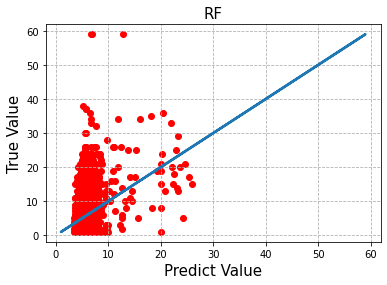

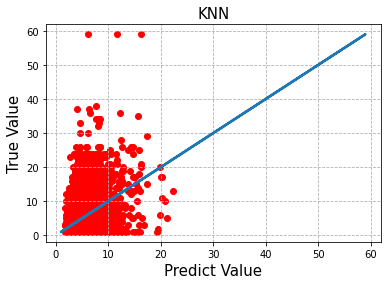

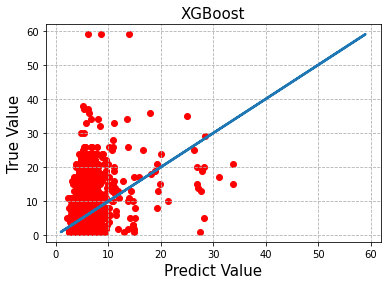

0.5360655737704918
0.5721311475409836
0.5354508196721312


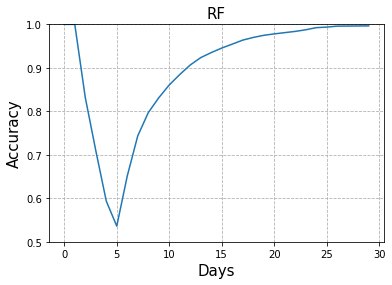

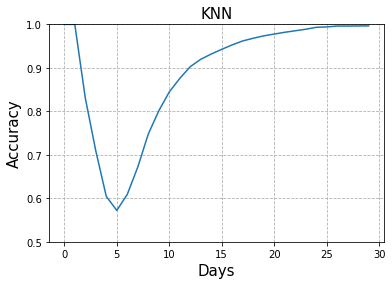

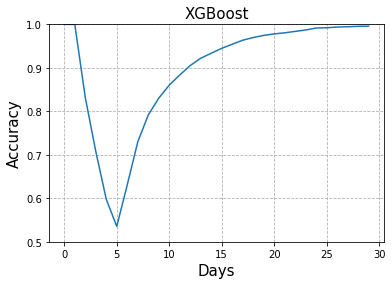

4.989651134326586 5.264299807098413 5.055632131740037
0.07338280090711646 -0.031433476958955486 0.048714396603715016


(4.989651134326586,
 5.264299807098413,
 5.055632131740037,
 0.07338280090711646,
 -0.031433476958955486,
 0.048714396603715016)

In [ ]:
distance = 30
path = 'drive/MyDrive/New_Wildfire/Model_Input/LS_fire_' + str(distance)+'km.csv'
X_train, X_test, y_train, y_test = Ls_Data_Process(path)
X_train, y_train, X_test, y_test= np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
Train_model(X_test, y_test)

# print(len(X_train), len(X_test))

# Part5. Image-based Model

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import random
import numpy as np
from tqdm.notebook import tqdm
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from tqdm import tqdm
from PIL import Image
import cv2
import pandas as pd

import keras
from keras import layers
from keras.callbacks import TensorBoard
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Input, Dense, Flatten, Reshape, LeakyReLU
from keras.models import Model
from numpy import array
from numpy import hstack
from keras.layers import LSTM
from keras.layers import Input, Dense
from keras import losses
import tensorflow as tf
from keras.layers import Concatenate
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV

In [ ]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Load input

In [ ]:
duration = np.load('drive/MyDrive/Wildfire/CA_fire/CA_fire_data/duration_atlas_2003_2016.npy')
start_date = np.load('drive/MyDrive/Wildfire/CA_fire/CA_fire_data/start_date_atlas_2003_2016.npy')
veg_coord = np.load('drive/MyDrive/Wildfire/CA_fire/CA_fire_data/veg_coord.npy')
end_date = np.load('drive/MyDrive/Wildfire/CA_fire/CA_fire_data/end_date_atlas_2003_2016.npy')
fire_size = np.load('drive/MyDrive/Wildfire/CA_fire/CA_fire_data/size_atlas_2003_2016.npy')
# input dataset

resized_gc_5km = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_CNN_gc_resized.npy')
resized_tc_5km = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_CNN_tc_resized.npy')
resized_slope_5km = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_CNN_slope_resized.npy')

resized_combined_5km_3channel = np.load('drive/MyDrive/New_wildfire/Newdata/ls_resized_100.npy') # put three map in different channel

cropped_gc_5km = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_grass_cover_5km.npy')
cropped_tc_5km = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_tree_cover_5km.npy')
cropped_slope_5km = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_tree_slope_5km.npy')


In [ ]:

y_train = duration[0:20000]
y_test = duration[20000:24000]



## AutoEncoder Process

In [ ]:
def my_encoder_model(input_img):
  act_f = str("relu") # relu
  # encoder structure
  x = layers.Conv2D(32, (10, 10), activation= act_f, padding='same')(input_img) #conv layer
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = LeakyReLU(alpha=0.3)(x)
  x = Dense(169, activation= act_f)(x)
  x = LeakyReLU(alpha=0.3)(x)
  encoded = Dense(20, activation= act_f)(x)

  return encoded

def my_decoder_model(encoded):
  act_f = str("relu") # relu
  # decoder structure
  x = Dense(20, activation= act_f)(encoded)
  x = LeakyReLU(alpha=0.3)(x)
  x = Dense(169, activation= act_f)(x)
  x = LeakyReLU(alpha=0.3)(x)
  x = Reshape((13, 13, 1))(x)

  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(32, (10, 10), activation= act_f, padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)

  decoded = layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x) # try
  return decoded


In [ ]:
# input shape
input_img = keras.Input(shape=(100, 100, 1))
# for the encoeded data
encoded = my_encoder_model(input_img)
print(encoded.shape)

decoded = my_decoder_model(encoded)
print(decoded.shape)


# combine the encode and decode parts as autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss="mse")


layer_number = 12
# # this model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# this model maps the encoded representation to the original representation
encoded_input = Input(shape=(32,))
decoder = autoencoder.layers[-layer_number](encoded_input)
for i in range(layer_number-1):
  decoder = autoencoder.layers[i-layer_number+1](decoder)
decoder = keras.Model(encoded_input, decoder)

In [ ]:
autoencoder.fit(tree_train, tree_train, validation_data = (X_test, y_test)
                epochs=250,
                batch_size=100,
                shuffle=True)

In [ ]:
autoencoder_predict_img = autoencoder.predict(X_test)


## Encoder with training

In [ ]:
gc_5km_train = cropped_gc_5km[0:20000]
tc_5km_train = cropped_tc_5km[0:20000]
slope_5km_train = cropped_slope_5km[0:20000]

gc_5km_test = cropped_tc_5km[20000:24000]
tc_5km_test = cropped_tc_5km[20000:24000]
slope_5km_test = cropped_slope_5km[20000:24000]



In [ ]:
def encode_vc(input_img):
  act_f = str("relu") # relu

  x = layers.Conv2D(32, (10, 10), activation= act_f, padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = LeakyReLU(alpha=0.3)(x)
  x = Dense(169, activation= act_f)(x)
  x = LeakyReLU(alpha=0.3)(x)
  encoded = Dense(20, activation= act_f)(x)

  return encoded


def encode_slope(input_img):
  act_f = str("relu") # relu

  x = layers.Conv2D(32, (10, 10), activation= act_f, padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = LeakyReLU(alpha=0.3)(x)
  x = Dense(64, activation= act_f)(x)
  x = LeakyReLU(alpha=0.3)(x)
  encoded = Dense(10, activation= act_f)(x)

  return encoded



In [ ]:

inputA = Input(shape=(100, 100, 1))
inputB = Input(shape=(100, 100, 1))
inputC = Input(shape=(30, 30, 1))
# inputD = Input(shape=()
# input of windu and wind v
 
# the first branch operates on the first input
x = encode_vc(inputA)
 
# the second branch opreates on the second input
x2 = encode_vc(inputB)

x3 = encode_slope(inputC)
 
# combine the output of the two branches
combined = Concatenate(axis=1)([x, x2, x3])
# print(combined.shape)
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(50, activation="relu")(combined)
z = Dense(1, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
CNN_model = keras.Model(inputs=[inputA, inputB, inputC], outputs=z)
CNN_model.summary()
CNN_model.compile(optimizer = 'adam', loss = 'mse') 
# try sgd, and diff lr


In [ ]:
CNN_model.fit((gc_5km_train, tc_5km_train, slope_5km_train), y_train, validation_data = ((gc_5km_test, tc_5km_test, slope_5km_test), y_test), epochs = 20, batch_size = 256)

In [ ]:
model_predict = CNN_model.predict((gc_5km_test, tc_5km_tes))

## Train Encoder first

In [ ]:
# gc_5km_train = cropped_gc_5km[0:20000]
# tc_5km_train = cropped_tc_5km[0:20000]
# slope_5km_train = cropped_slope_5km[0:20000]

# gc_5km_test = cropped_tc_5km[20000:24000]
# tc_5km_test = cropped_tc_5km[20000:24000]
# slope_5km_test = cropped_slope_5km[20000:24000]

In [ ]:
def my_encoder_model(input_img):
  act_f = str("relu") # relu

  x = layers.Conv2D(32, (10, 10), activation= act_f, padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = LeakyReLU(alpha=0.3)(x)
  x = Dense(169, activation= act_f)(x)
  x = LeakyReLU(alpha=0.3)(x)
  encoded = Dense(20, activation= act_f)(x)

  return encoded

def my_decoder_model(encoded):
  act_f = str("relu") # relu

  x = Dense(20, activation= act_f)(encoded)
  x = LeakyReLU(alpha=0.3)(x)
  x = Dense(169, activation= act_f)(x)
  x = LeakyReLU(alpha=0.3)(x)
  x = Reshape((13, 13, 1))(x)

  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (10, 10), activation= act_f, padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(32, (10, 10), activation= act_f, padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)

  decoded = layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x) # try
  return decoded

In [ ]:
 # input shape
  input_img = keras.Input(shape=(100, 100, 1))
  # for the encoeded data
  encoded = my_encoder_model(input_img)
  print(encoded.shape)

  decoded = my_decoder_model(encoded)
  print(decoded.shape)


  # combine the encode and decode parts as autoencoder
  autoencoder = keras.Model(input_img, decoded)
  autoencoder.summary()
  autoencoder.compile(optimizer='adam', loss="mse")


  layer_number = 12
  # # this model maps an input to its encoded representation
  encoder = keras.Model(input_img, encoded)

  # this model maps the encoded representation to the original representation
  encoded_input = Input(shape=(32,))
  decoder = autoencoder.layers[-layer_number](encoded_input)
  for i in range(layer_number-1):
    decoder = autoencoder.layers[i-layer_number+1](decoder)
  decoder = keras.Model(encoded_input, decoder)


In [ ]:
autoencoder.fit(tree_train, tree_train,
                epochs=250,
                batch_size=100,
                shuffle=True)

In [ ]:
# save model

In [ ]:
autoencoder.fit(tree_train, tree_train,
                epochs=250,
                batch_size=100,
                shuffle=True)

## Traditional CNN

Setup train and test set

In [ ]:
X_train_model3 = resized_combined_5km_3channel[0:20000]
X_test_model3 = resized_combined_5km_3channel[20000:24000]



Build Model

In [ ]:
CNN_ori = Sequential()
# input = Input(shape=(100, 100, 3))
CNN_ori.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100, 100, 3)))
CNN_ori.add(layers.Conv2D(64, (3, 3), activation='relu')) 
CNN_ori.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN_ori.add(layers.Dropout(0.25))
CNN_ori.add(layers.MaxPooling2D(pool_size=(2, 2)))
CNN_ori.add(Flatten()) 
CNN_ori.add(Dense(128, activation='linear'))
CNN_ori.add(LeakyReLU(alpha=0.2))
CNN_ori.add(layers.Dropout(0.5))
CNN_ori.add(Dense(1, activation='linear'))
# optimizer = tf.keras.optimizers.Adam(0.001)
# optimizer.learning_rate.assign(0.01)
# print(optimizer.learning_rate)
# CNN_ori_model = keras.Model(inputs= input, outputs=z)
CNN_ori.summary()
CNN_ori.compile(optimizer = 'adam', loss = 'mse') 

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
CNN_ori.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=20, batch_size=128)

In [ ]:
model_predict_3 = CNN_ori.predict(X_test)

# Part6. Result Plot

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import random
import numpy as np
from tqdm.notebook import tqdm
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from tqdm import tqdm
from PIL import Image
import cv2
import pandas as pd

import keras
from keras import layers
from keras.callbacks import TensorBoard
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Input, Dense, Flatten, Reshape, LeakyReLU, Resizing, Cropping2D
from keras.models import Model
from numpy import array
from numpy import hstack
from keras.layers import LSTM
from keras.layers import Input, Dense
from keras import losses
import tensorflow as tf
from keras.layers import Concatenate
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV

In [2]:
def Standrize(X):
  # X = (X-X.mean())/X.std()
  # X = X/X.max()
  X = (X - X.min())/(X.max() - X.min())
  return X

# reshape data into reasonable size for training. 
def data_reshaping(df,sizex,sizey):
  train_data = []
  test_data = []
  n = 24000
  index = 19120
  for i in range(index):
    train_data.append(df[i])
  for i in range(index, n):
    test_data.append(df[i])
  train_data = np.array(train_data)
  train_data = Standrize(train_data)
  train_data = np.reshape(train_data, (index, sizex, sizey, 1))
  test_data = np.array(test_data)
  test_data = Standrize(test_data)
  test_data = np.reshape(test_data, ((n-index), sizex, sizey, 1))
  return train_data, test_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")
    

No GPU available!


In [5]:
# load required data
duration = np.load('drive/MyDrive/New_Wildfire/Newdata/duration_atlas_2003_2016.npy')
gc_5km_dataset = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_grass_cover_5km.npy')
tc_5km_dataset = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_tree_cover_5km.npy')
slope_5km_dataset = np.load('drive/MyDrive/New_Wildfire/Newdata/ls_slope_5km.npy')
# data reshaping
gc_5km_train, gc_5km_test = data_reshaping(gc_5km_dataset, 100, 100)
tc_5km_train, tc_5km_test = data_reshaping(tc_5km_dataset, 100, 100)
slope_5km_train, slope_5km_test = data_reshaping(slope_5km_dataset, 30, 30)
gc_5km_train, gc_5km_test, tc_5km_train, tc_5km_test, slope_5km_train, slope_5km_test = Standrize(gc_5km_train), Standrize(gc_5km_test), Standrize(tc_5km_train), Standrize(tc_5km_test), Standrize(slope_5km_train), Standrize(slope_5km_test)
y_train = duration[0:19120]
y_test = duration[19120:24000]



In [ ]:
del gc_5km_dataset, tc_5km_dataset, slope_5km_dataset

In [6]:
# load our model 
from keras.models import load_model
CNN_Encoder_model = load_model('/content/drive/MyDrive/New_Wildfire/models/encode_inside_CNN_three_feature.h5')


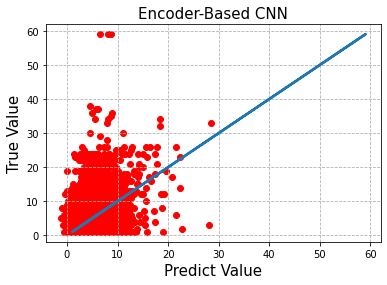

0.005221365489178287
26.727999568970006
0.6301229508196722
2.5372221 mean value


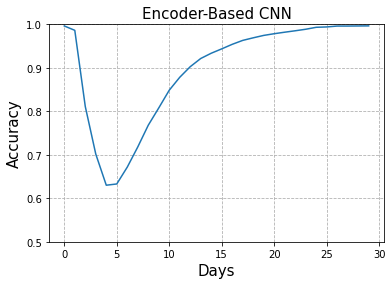

In [7]:
# plot
y_pred = CNN_Encoder_model.predict((gc_5km_test, tc_5km_test, slope_5km_test))
plt.plot(y_test, y_test, linewidth = 2.5, zorder = 2)
plt.plot(y_pred, y_test, 'ro', zorder = 1)
plt.xlabel('Predict Value', fontsize = 15)
plt.grid(ls='--')
plt.ylabel('True Value', fontsize = 15)
plt.title('Encoder-Based CNN', fontsize = 15)
plt.savefig('drive/MyDrive/sr_fig/Prediction_Plot_Encoder.png', dpi = 500)
plt.show()
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

prob = []
i_ = []
total = len(y_test)
for i in range(30):
  count = 0
  for j in range(len(y_test)):
    if y_test[j] >=i and y_pred[j] >= i:
      count += 1
    if y_test[j] <=i and y_pred[j] <= i:
      count += 1
  prob_i = count/total
  prob.append(prob_i)
  i_.append(i)
print(min(prob))
plt.plot(i_, prob)
plt.grid(ls='--')
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.ylim(0.5, 1)
plt.title('Encoder-Based CNN', fontsize = 15)
plt.savefig('drive/MyDrive/sr_fig/Accuracy_Plot_Encoder.png', dpi = 500)

mse = []
for i in range(4000):
  mse.append(np.linalg.norm((y_test[i] - y_pred[i]))/np.linalg.norm(y_pred[i]))

print(np.mean(mse), 'mean value')


In [ ]:
print(mean_squared_error(y_test, y_pred))

26.727999568970006


In [ ]:
from keras.models import load_model
CNN_ori = load_model('/content/drive/MyDrive/New_Wildfire/models/traditional_CNN_three_layers_size100.h5')


In [ ]:
del gc_5km_train, gc_5km_test, tc_5km_train, tc_5km_test, slope_5km_train, slope_5km_test

In [ ]:

comb_data = np.load('drive/MyDrive/New_Wildfire/Model_Input/CNN_ori_input_size100_123.npy')
index = 19120
n = 24000
X_train = comb_data[0:index]
X_test = comb_data[index:24000]
X_train = Standrize(X_train)
X_test = Standrize(X_test)

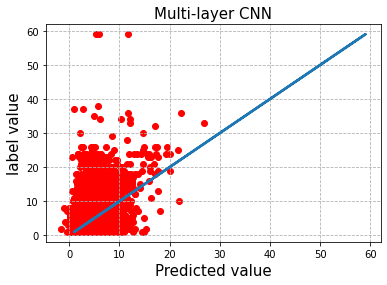

0.050613006044496145
0.6297131147540984
0.9890095 mean value


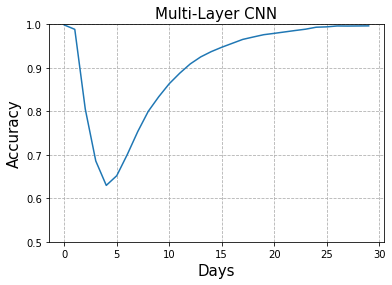

In [ ]:
# y_pred = CNN_ori.predict(X_test)
plt.plot(y_test, y_test, linewidth = 2.5, zorder = 2)
mse = mean_squared_error(y_test, y_pred)
plt.plot(y_pred, y_test, 'ro', zorder = 1)
plt.xlabel('Predicted value', fontsize = 15)
plt.ylabel('label value', fontsize = 15)
plt.grid(ls='--')
plt.title('Multi-layer CNN', fontsize = 15)
plt.savefig('drive/MyDrive/sr_fig/Prediction_Plot_Mutil_CNN.png', dpi = 500)
plt.show()
print(r2_score(y_test,y_pred))


prob = []
i_ = []
total = len(y_test)
for i in range(30):
  count = 0
  for j in range(len(y_test)):
    if y_test[j] >=i and y_pred[j] >= i:
      count += 1
    if y_test[j] <=i and y_pred[j] <= i:
      count += 1
  prob_i = count/total
  prob.append(prob_i)
  i_.append(i)
print(min(prob))
plt.plot(i_, prob)
plt.grid(ls='--')
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Days', fontsize = 15)
plt.ylim(0.5, 1)
plt.title('Multi-Layer CNN', fontsize = 15)
plt.savefig('drive/MyDrive/sr_fig/Accuracy_Plot_Multi_CNN.png', dpi = 500)


y_pred = CNN_ori.predict(X_test)
mse = []
for i in range(4000):
  mse.append(np.linalg.norm((y_test[i] - y_pred[i]))/np.linalg.norm(y_pred[i]))

print(np.mean(mse), 'mean value')